In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
X.fillna(X.mean(),inplace=True)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier 
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)


DecisionTreeClassifier()

In [9]:
y_pred=dt_model.predict(X_test)

In [10]:
print(y_pred)

['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Virginica' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa']


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [12]:
print(accuracy_score(y_test,y_pred))

1.0


In [13]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



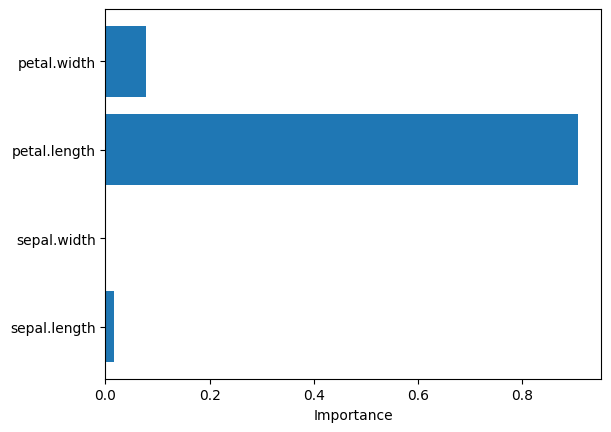

In [15]:
plt.barh(data.columns[:-1],dt_model.feature_importances_)
plt.xlabel('Importance')
plt.show()

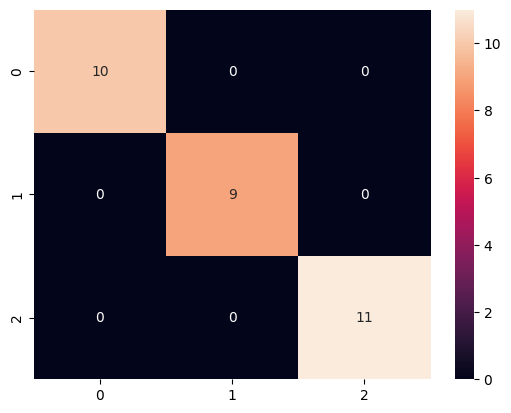

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
print(accuracy_score(y_test,rf_model.predict(X_test)))

1.0


In [19]:
print(confusion_matrix(y_test,rf_model.predict(X_test)))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [20]:
print(classification_report(y_test,rf_model.predict(X_test)))   

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



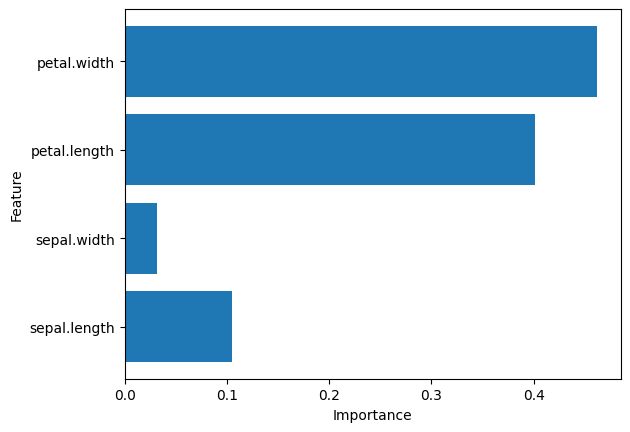

In [21]:
plt.barh(data.columns[:-1],rf_model.feature_importances_)
plt.xlabel  ('Importance')
plt.ylabel ('Feature')
plt.show()

<Axes: >

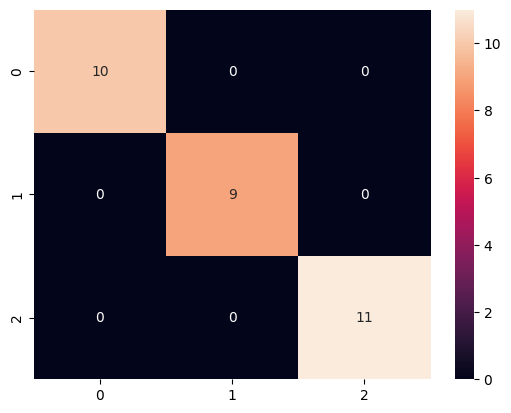

In [22]:
sns.heatmap(confusion_matrix(y_test,rf_model.predict(X_test)),annot=True,fmt='d')

In [23]:
import joblib
joblib.dump(rf_model,'model.pkl')

['model.pkl']

In [24]:
import joblib
import os
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

# Set page configuration
st.set_page_config(
    page_title="ML Prediction App",
    page_icon=":factory:",
    layout="wide",
    initial_sidebar_state="expanded",
)

# Load model
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, 'model.pkl')
# model = joblib.load(model_path)

#model_path = 'model.pkl'
model_path = os.path.join(os.getcwd(), 'model.pkl')
if os.path.exists(model_path):
    model = joblib.load(model_path)
    st.success("Model loaded successfully!")
else:
    st.error(f"Model file not found at {model_path}. Please upload the model file.")


# Sidebar for navigation
st.sidebar.title("Navigation")
st.sidebar.markdown("Use the options below to interact with the app:")

# Main title and description
st.title("Machine Learning Prediction App")
st.markdown("""
    Welcome to the ML Prediction App. This tool allows you to input data and receive predictions based on our trained machine learning model.
    Please enter your data in CSV format below.
""")

# Input section
st.header("Input Data")
input_data = st.text_area(
    "Enter your data in CSV format:",
    placeholder="e.g., 1.23, 4.56, 7.89",
    height=100
)

# Prediction section
if input_data:
    try:
        data = [float(x) for x in input_data.split(",")]
        predictions = model.predict([data])
        st.success("Prediction successful!")
        st.header("Predictions")
        st.write(predictions)
    except ValueError:
        st.error("Invalid input format. Please ensure all inputs are numeric and separated by commas.")

# Real-time data visualization
st.header("Real-Time Data Visualization")
if input_data:
    data_dict = {f"Feature {i+1}": [float(x)] for i, x in enumerate(input_data.split(","))}
    df = pd.DataFrame(data_dict)

    # Bar Chart
    fig, ax = plt.subplots()
    ax.bar(df.columns, df.iloc[0], color='skyblue')
    ax.set_title("Feature Values (Bar Chart)")
    ax.set_xlabel("Features")
    ax.set_ylabel("Values")
    st.pyplot(fig)

    # Line Plot
    fig, ax = plt.subplots()
    ax.plot(df.columns, df.iloc[0], color='green', marker='o', linestyle='-', linewidth=2, markersize=8)
    ax.set_title("Feature Values (Line Plot)")
    ax.set_xlabel("Features")
    ax.set_ylabel("Values")
    ax.grid(True)
    st.pyplot(fig)

    # Scatter Plot
    fig, ax = plt.subplots()
    ax.scatter(df.columns, df.iloc[0], color='red', s=100, edgecolors='black')
    ax.set_title("Feature Values (Scatter Plot)")
    ax.set_xlabel("Features")
    ax.set_ylabel("Values")
    st.pyplot(fig)

    # Customizable Plot Type
    st.sidebar.header("Choose Plot Type")
    plot_type = st.sidebar.selectbox("Select Visualization Type", ["Bar", "Line", "Scatter"])

    # Update plot based on selected type
    if plot_type == "Bar":
        fig, ax = plt.subplots()
        ax.bar(df.columns, df.iloc[0], color='skyblue')
        ax.set_title("Feature Values (Bar Chart)")
        ax.set_xlabel("Features")
        ax.set_ylabel("Values")
        st.pyplot(fig)
    elif plot_type == "Line":
        fig, ax = plt.subplots()
        ax.plot(df.columns, df.iloc[0], color='purple', marker='o', linestyle='-', linewidth=2, markersize=8)
        ax.set_title("Feature Values (Line Plot)")
        ax.set_xlabel("Features")
        ax.set_ylabel("Values")
        ax.grid(True)
        st.pyplot(fig)
    else:
        fig, ax = plt.subplots()
        ax.scatter(df.columns, df.iloc[0], color='orange', s=100, edgecolors='black')
        ax.set_title("Feature Values (Scatter Plot)")
        ax.set_xlabel("Features")
        ax.set_ylabel("Values")
        st.pyplot(fig)

# Footer with contact information
st.markdown("---")
st.markdown("""
    **Contact Information**

    For further inquiries or support, please contact our team at [balivadatarun@gmail.com](mailto:balivadatarun@gmail.com).
""")


2024-12-29 14:18:22.625 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 14:18:22.677 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 14:18:23.571 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-29 14:18:23.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 14:18:23.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 14:18:23.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-29 14:18:23.579 Thread 'MainThread': missing ScriptRunContext! This warning can be

DeltaGenerator()